In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

1 Define Problem statement

We have to predict the price of car by using autos car dataset.

2 Gather the Data

In [2]:
df = pd.read_csv(r'C:\Users\Pravin\anaconda3\autos_dataset.csv')


3 Perform EDA on data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df.replace({'?':np.nan},inplace =True)


We will checck columnwise and if any then fill value

In [6]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].median()).astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
df['fuel-type'].isna().sum()
df['fuel-type'].value_counts()
df['fuel-type'].replace({'gas':0,'diesel':1},inplace =True)

In [11]:
df['fuel-type']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
df['aspiration'].isna().sum()
df['aspiration'].value_counts()
df['aspiration'].replace({'std':0,'turbo':1},inplace = True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
df['num-of-doors'].isna().sum()
df['num-of-doors'].value_counts()
df['num-of-doors'].replace({'four':4,'two':2},inplace  =True)
df['num-of-doors'].isna().sum()
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].median())
df['num-of-doors'].isna().sum()
df['num-of-doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [16]:
df['body-style'].isna().sum()
df['body-style'].value_counts()
df = pd.get_dummies(df,columns  =['body-style'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    object 
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [17]:
df['drive-wheels'].isna().sum()
df['drive-wheels'].value_counts().to_dict()


{'fwd': 120, 'rwd': 76, '4wd': 9}

In [18]:
df['drive-wheels'].replace({'fwd': 1, 'rwd': 2, '4wd':3},inplace =True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    object 
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [20]:
df['engine-location'].isna().sum()
df['engine-location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [21]:
df['engine-location'].replace({'front':1, 'rear':0},inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [23]:
df['wheel-base'].isna().sum()
df['wheel-base'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [25]:
df['engine-type'].isna().sum()
df['engine-type'].value_counts()
df = pd.get_dummies(df,columns = ['engine-type'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

In [27]:
df['num-of-cylinders'].isna().sum()
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [28]:
df['num-of-cylinders'].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve': 12},inplace =True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [30]:
df['fuel-system'].isna().sum()
df['fuel-system'].value_counts()
df = pd.get_dummies(df,columns  =['fuel-system'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [32]:
df['bore'].isna().sum()
df['bore'] = df['bore'].fillna(df['bore'].median()).astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [34]:
df['price'] = df['price'].fillna(df['price'].median()).astype(float)

In [35]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median()).astype(float)
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median()).astype(float)
df['stroke'] = df['stroke'].fillna(df['stroke'].median()).astype(float)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [37]:
df = df.drop(['make'],axis =1)

In [38]:
x = df.drop(['price'],axis =1)
y = df['price']

In [39]:
df.isna().sum()

symboling                 0
normalized-losses         0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor         0
fuel-system_1bbl          0
fuel-system_2bbl    

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 2,shuffle =True)
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = lin_reg.predict(x_test)
print(y_test[20:25])
print(y_pred[20:25])

23     7957.0
45    10295.0
6     17710.0
12    20970.0
64    11245.0
Name: price, dtype: float64
[ 8279.30656165  6562.99474091 22894.8353259  16654.95839919
 11262.91044737]


Evaluation on Testing

In [42]:
mse  = mean_squared_error(y_test,y_pred)
print(mse)
rmse  =np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2 = r2_score(y_test,y_pred)
print(r2)

21140319.221736033
4597.860287322357
3142.6692007171596
0.39337480425790017


Evaluation on Training Data

In [43]:
y_pred_train = lin_reg.predict(x_train)

In [44]:
mse  = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse  =np.sqrt(mse)
print(rmse)
mae  =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)


4126642.7184979306
2031.4139702428774
1472.778009339281
0.9397444224956264


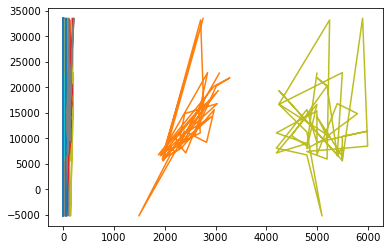

In [45]:
plt.plot(x_test,y_pred)

In [46]:
x.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [47]:
a = np.array([4,115,1,1,2,2,1,88,169,56.1,48.9,2549,3,130,3.48,2.68,9.0,116,5000,21,27,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0],ndmin =2)

In [48]:
out = lin_reg.predict(a)
print(out)


[21188.60298345]


In [49]:
df1 = pd.read_csv(r'C:\Users\Pravin\anaconda3\autos_dataset.csv')

In [50]:
onhot_enc = OneHotEncoder(dtype =int)

In [51]:
onhot_enc.fit(df1[['make']])

OneHotEncoder(dtype=<class 'int'>)

In [52]:
array =onhot_enc.fit_transform(df1[['make']]).toarray()
array

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [53]:
x_train = df1['make'].head(170)
x_test = df1['make'].tail(35)

In [54]:
#df3 = pd.DataFrame(array,columns =onhot_enc.categories_)

In [55]:
#df4 = pd.concat([df,df3],axis=1)

In [56]:
x.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [57]:
df['highway-mpg'].head()

0    27
1    27
2    26
3    30
4    22
Name: highway-mpg, dtype: int64

In [58]:
column_names = x.columns

In [59]:
symboling=3
normalized_losses= 115
fuel_type= 'gas'
aspiration=0
num_of_doors= 'two'
drive_wheels=2
engine_location=1
wheel_base=89
length=168.8
width= 65
height=49
curb_weight=2548
num_of_cylinders='four'
engine_size= 130
bore= 3.48
stroke= 2.68
compression_ratio= 9
horsepower=111
peak_rpm= 5000
city_mpg= 21
highway_mpg= 27

In [60]:
fuel_type_values = {'gas':0,'diesel':1}
num_of_doors_values = {'four':4,'two':2}
num_of_cylinders_values ={'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve': 12}

In [61]:
array1 = np.zeros((len(x.columns)),dtype =int)


num_of_cylinders = num_of_cylinders_values[num_of_cylinders]
fuel_type = fuel_type_values[fuel_type]
num_of_doors=num_of_doors_values[num_of_doors]

array1[0]=symboling
array1[1]=normalized_losses
array1[2]=fuel_type
array1[3]=aspiration
array1[4]=num_of_doors
array1[5]=drive_wheels
array1[6]=engine_location
array1[7]=wheel_base
array1[8]=length
array1[9]=width
array1[10]=height
array1[11]=curb_weight
array1[12]=num_of_cylinders
array1[13]=engine_size
array1[14]=bore
array1[15]=stroke
array1[16]=compression_ratio
array1[17]=horsepower
array1[18]=peak_rpm
array1[19]=city_mpg
array1[20]=highway_mpg

body_style='body-style_'+'hatchback'
engine_type='engine-type_'+'ohc'
fuel_system='fuel-system_'+'idi'

body_style_index=np.where(column_names==body_style)[0][0]
engine_type_index = np.where(column_names==engine_type)[0][0]
fuel_system_index = np.where(column_names==fuel_system)[0][0]

array1[body_style_index]=1
array1[engine_type_index]=1
array1[fuel_system_index]=1

print(lin_reg.predict([array1]))

[36587.16463169]


In [62]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(lin_reg,f)

In [63]:
label_encoded_columns = {'num_of_doors':num_of_doors_values,'fuel_type':fuel_type_values,
                         'num_of_cylinders':num_of_cylinders_values,'Columns':list(x.columns)}




In [64]:
import json
with open('ss.json','w') as f:
    json.dump(label_encoded_columns,f)

In [67]:
x.columns


Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')